In [ ]:
!pip install -q transformers[torch] datasets accelerate tokenizers seqeval evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00


BertTokenizerFast → Splits text into tokens for BERT models (fast version).


DataCollatorForTokenClassification → Prepares batches of data by padding them properly.


AutoModelForTokenClassification → Loads a pre-trained model for tasks like NER (Named Entity Recognition).

In [ ]:
import datasets
import numpy as np
from transformers import BertTokenizerFast
from transformers import DataCollatorForTokenClassification
from transformers import AutoModelForTokenClassification

In [ ]:
conll2003 = datasets.load_dataset("conll2003")

README.md:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

conll2003.py:   0%|          | 0.00/9.57k [00:00<?, ?B/s]

The repository for conll2003 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/conll2003.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [ ]:
conll2003

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

In [ ]:
conll2003["train"]

Dataset({
    features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
    num_rows: 14041
})

In [ ]:
conll2003["train"][0]

{'id': '0',
 'tokens': ['EU',
  'rejects',
  'German',
  'call',
  'to',
  'boycott',
  'British',
  'lamb',
  '.'],
 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7],
 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0],
 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}

In [ ]:
conll2003["train"]['features']

KeyError: "Column features not in the dataset. Current columns in the dataset: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags']"

In [ ]:
conll2003["train"].features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'pos_tags': Sequence(feature=ClassLabel(names=['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None),
 'chunk_tags': Sequence(feature=ClassLabel(names=['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'], id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)}

In [ ]:
conll2003["train"].features['ner_tags']

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)

CoNLL-2003 Dataset Kya Hai?

CoNLL-2003 ek NER (Named Entity Recognition) dataset hai, jo 2003 ke CoNLL (Conference on Computational Natural Language Learning) me introduce kiya gaya tha. Yeh dataset news articles ka collection hai aur 4 entity types detect karne ke liye use hota hai:

PER → Person (e.g., "Elon Musk")

LOC → Location (e.g., "India", "New York")

ORG → Organization (e.g., "Google", "NASA")

MISC → Miscellaneous (e.g., "Olympics", "iPhone")

In [ ]:
model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased" , num_labels = 9)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from transformers import  pipeline

In [ ]:
ner_pipeline = pipeline("ner" , model=model , tokenizer= tokenizer)

Device set to use cuda:0


In [ ]:
sen = "Hi , Abhijeet "

In [ ]:
ner_pipeline(sen)

[{'entity': 'LABEL_0',
  'score': 0.1734219,
  'index': 1,
  'word': 'hi',
  'start': 0,
  'end': 2},
 {'entity': 'LABEL_0',
  'score': 0.17204413,
  'index': 2,
  'word': ',',
  'start': 3,
  'end': 4},
 {'entity': 'LABEL_0',
  'score': 0.20312193,
  'index': 3,
  'word': 'ab',
  'start': 5,
  'end': 7},
 {'entity': 'LABEL_0',
  'score': 0.14387508,
  'index': 4,
  'word': '##hi',
  'start': 7,
  'end': 9},
 {'entity': 'LABEL_3',
  'score': 0.17512055,
  'index': 5,
  'word': '##jee',
  'start': 9,
  'end': 12},
 {'entity': 'LABEL_7',
  'score': 0.16111402,
  'index': 6,
  'word': '##t',
  'start': 12,
  'end': 13}]

In [ ]:
conll2003["train"][1]

{'id': '1',
 'tokens': ['Peter', 'Blackburn'],
 'pos_tags': [22, 22],
 'chunk_tags': [11, 12],
 'ner_tags': [1, 2]}

# Tokenizer

In [ ]:
sen = "Hello Abhijeet How are you"

In [ ]:
tokenizer(sen)

{'input_ids': [101, 7592, 11113, 4048, 16963, 2102, 2129, 2024, 2017, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.tokenize(sen)

['hello', 'ab', '##hi', '##jee', '##t', 'how', 'are', 'you']

In [ ]:
tokenizer.convert_tokens_to_ids(  tokenizer.tokenize(sen)  )

[7592, 11113, 4048, 16963, 2102, 2129, 2024, 2017]

101 and 102 " s> /s> "

In [ ]:
l = [7592, 11113, 4048]

tokenizer.convert_ids_to_tokens(l)

['hello', 'ab', '##hi']

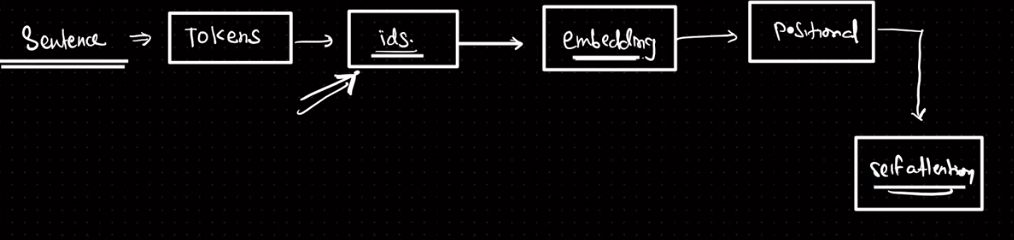

along tokenize -> number + sos + eos + padding

In [ ]:
for i in model.parameters():
    print(i)
    print("\n")

Streaming output truncated to the last 5000 lines.
         2.0335e-02, -8.5442e-03, -6.6706e-03,  1.3002e-02, -1.4796e-02,
         3.8096e-02, -1.4293e-03, -1.0802e-02,  2.2532e-02,  1.6324e-02,
         3.3287e-03, -2.5329e-03,  8.0914e-03, -1.5704e-02, -8.1367e-03,
         8.0492e-03,  6.3210e-03,  1.2887e-02, -1.5570e-02, -1.6245e-02,
         3.7748e-03, -9.4684e-03,  5.1092e-03, -1.5236e-03, -7.8516e-03,
         3.0148e-02, -4.6574e-03, -1.5652e-02, -1.8414e-02, -4.8857e-03,
         1.2938e-02,  1.3619e-03,  1.6399e-02,  3.7851e-02,  4.8976e-04,
         2.2249e-03,  3.5374e-02, -4.6371e-02,  3.1519e-02,  1.1191e-02,
         3.5942e-02, -3.4612e-03, -8.5393e-03, -1.8504e-02,  1.7272e-02,
         5.3372e-02, -1.5619e-02, -2.8099e-02,  1.0773e-03,  2.1760e-02,
         3.8248e-02, -4.7646e-03,  1.9283e-02, -6.7653e-03, -1.7880e-02,
         3.9084e-03,  3.5228e-02,  3.6506e-03,  7.3232e-03,  3.7074e-03,
         1.6152e-03,  2.7036e-02, -1.6412e-03, -4.4253e-03, -2.2397e-03,
